In [22]:
!pip install -U statsmodels

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [25]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [26]:
# Set freq to 'MS'
df.index.freq='MS'

Walk-Forward Validation is a Time Series equivalent of a Cross Validation Train Test Split

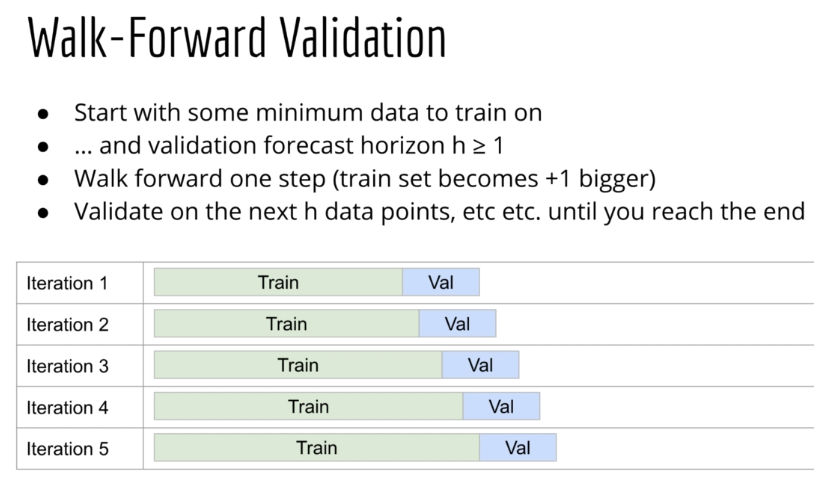

In [27]:
# Set forecast horizon and steps
# The forecast horizon is the length of time into the future 
# for which forecasts are to be prepared

# Assume the horizon is 12 with 10 steps of data

# The effective validation period discovered by the author called Ntest 
# is the length of entire dataframe - h - steps + 1

h = 12
steps = 10
Ntest = len(df) - h - steps + 1

In [28]:
# Configure several hyperparameters

trend_type_list = ['add','mul']
seasonal_type_list = ['add','mul']
damped_trend_list = [True, False]
init_method_list = ['estimated','heuristic','legacy-heuristic']
use_boxcox_list = [True, False, 0]

# PS: False the log when using boxcox

In [29]:
def walkforward(trend_type,seasonal_type,damped_trend,init_method,use_boxcox,debug=False):

  # Store errors
  # seen_last used as a flag to indicate whether the code has looped to the
  # last row of the dataframe or not to ensure that we have the correct loop limit

  # steps_completed will increment by one each round and should have the same number
  # as the number of loops we set which is 10
  errors = []
  seen_last = False
  steps_completed = 0

  for end_of_train in range(Ntest, len(df) - h + 1):
    # kita tidak perlu add manual data kedalam dataset
    # kita hanya tinggal index saja di titik yang tepat -> ini cuma 'tampilan' bukan 'copyan'
    # sehingga tidak memakan memori
    train = df.iloc[:end_of_train]
    test = df.iloc[end_of_train:end_of_train + h]

    if test.index[-1] == df.index[-1]:
      seen_last = True

    steps_completed += 1

    hw = ExponentialSmoothing(train['Passengers'], initialization_method=init_method, trend=trend_type, damped_trend=damped_trend, seasonal=seasonal_type, seasonal_periods=12, use_boxcox=use_boxcox)
    res_hw = hw.fit()

    # Compute error for the forecast horizon
    fcast = res_hw.forecast(h)
    error = mean_squared_error(test['Passengers'], fcast)
    errors.append(error)
  
  if debug:
    print("seen last:", seen_last)
    print("steps completed:", steps_completed)
  
  return np.mean(errors)

In [30]:
# Test the function
# The expected outputs are
# seen last: True
# steps completed: 10

walkforward('add', 'add', False, 'legacy-heuristic', 0, debug=True)

seen last: True
steps completed: 10


2521.023839609926

In [31]:
# Iterate through all possible options

tuple_of_option_lists = (trend_type_list, seasonal_type_list, damped_trend_list, init_method_list, use_boxcox_list)

for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [32]:
# Putting all together and using walk forward to find the best options

best_score = float('inf')
best_options = None
for x in itertools.product(*tuple_of_option_lists):
  score = walkforward(*x)

  if score < best_score:
    print("Best score so far: ", score)
    best_score = score
    best_options = x

Best score so far:  412.8172232531102
Best score so far:  412.70685632723337
Best score so far:  320.664050569128


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best score so far:  300.4779910420892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best score so far:  287.4047511223069


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

In [33]:
print("best score:", best_score)

trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print("trend_type", trend_type)
print("seasonal_type", seasonal_type)
print("damped_trend", damped_trend)
print("init_method", init_method)
print("use_boxcox", use_boxcox)

best score: 287.4047511223069
trend_type mul
seasonal_type mul
damped_trend True
init_method legacy-heuristic
use_boxcox False


In [34]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [35]:
hw = ExponentialSmoothing(train['Passengers'],initialization_method='legacy-heuristic',trend='mul',damped_trend=True,seasonal='mul',seasonal_periods=12,use_boxcox=False)
res_hw = hw.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [36]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [37]:
df.loc[train_idx, 'TrainPred'] = res_hw.fittedvalues
df.loc[test_idx, 'Forecast'] = res_hw.forecast(Ntest)

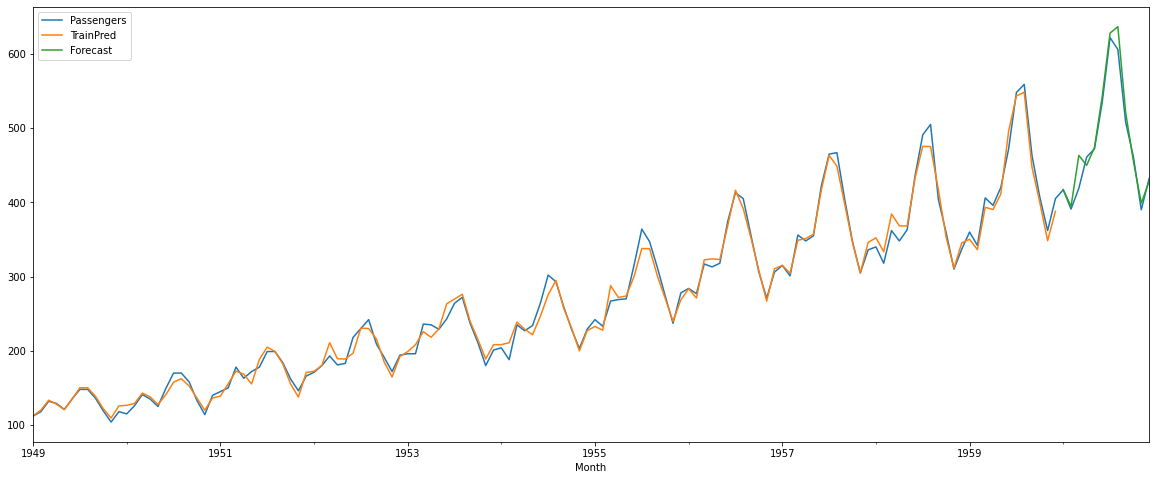

In [38]:
df[['Passengers', 'TrainPred', 'Forecast']].plot(figsize=(20, 8));